In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import seaborn as sns
from datetime import datetime
import holidays
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,\
                            f1_score, roc_auc_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance 
import matplotlib.pyplot as plt
from pynput.keyboard import Listener

C:\Users\singg\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def intro_inst():
    print('####################################################################################################\n')
    print('############################################  program start  #######################################\n')
    print("\n\n  Scrapper will work with Chrome")
    print("\n\n  Selenium must be the latest version")
    print("At frist, Crhome will run to scarp data from NYC Open Data.")
    print("It will take time, please just wait until the process is completed.")
    print("After finishing the scrapping you should move to the files at the same folder where this program located.")

In [3]:
def start_enter(sep=1):
    
    if sep == 1:
        print("\n####### If you installed the latest selenium and want to run program #### press enter key #######\n")
        print("\nFirstly, a chrome will be opened and crashes data will be downloaded")
        print("Then, the second chrome will be opened and person data will be downloaded\n")
    else:
        print("\#######nIf you moved the files to the folder, press enter key.###########\n")
        print("Then the program will restart and plese wait untill the program is completed.")
        print("From the data loading to building model, all processes will be processed.")
    
    if sep == 1:
        def on_press(key):
            try: 
                if key == key.enter:
                    print("Starting programing")
                    listener.stop()
            except:
                print("You pressed a wrong key.")
    else:
        def on_press(key):
            try: 
                if key == key.enter:
                    print("Starting programing")
                    print("It takes time to finish the whole program")
                    listener.stop()
            except:
                print("You pressed a wrong key.")

    def on_release(key):
        print("Please press Enter key")

    with Listener(on_press=on_press, on_release=on_release) as listener:
        listener.join()

In [4]:
def scrap_data(sep, url, s_date, f_date):
    
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service as ChromeService
    from webdriver_manager.chrome import ChromeDriverManager

    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(url)
    
    print("It's slow, please bare with with me")
    try:
        driver.implicitly_wait(20)
        continue_link = driver.find_element(By.LINK_TEXT, 'Filter')
        continue_link.click()
        print("Filter was selected")

        add_button = driver.find_element \
            (By.CSS_SELECTOR,
             "#controlPane_unifiedFilter_3 > form > div.paneContent > div.formSection.custom >\
             div.sectionContent.filterPane.advanced > div.initialFilterMode > a")
        add_button.click()

        if sep != 1:
            filter_list = driver.find_element(By.CSS_SELECTOR, \
                                              '#controlPane_unifiedFilter_3 > form > div.paneContent > div.formSection.custom > div.sectionContent.filterPane.advanced > div.normalFilterMode > div.filterConditions > div > div.filterHeadline > a.filterLink.columnName')
            filter_list.click()

            select_date = driver.find_element(By.CSS_SELECTOR,
                                              'body > div.bt-wrapper > div > div > ul > li:nth-child(3) > div')
            select_date.click()

            select_is = driver.find_element(By.CSS_SELECTOR,
                                            '#controlPane_unifiedFilter_3 > form > div.paneContent > div.formSection.custom > div.sectionContent.filterPane.advanced > div.normalFilterMode > div.filterConditions > div > div.filterHeadline > a.filterLink.operator')
            select_is.click()
        else:
            filter_list = driver.find_element(By.CSS_SELECTOR,
                                              '#controlPane_unifiedFilter_3 > form > div.paneContent >\
                                              div.formSection.custom > div.sectionContent.filterPane.advanced >\
                                              div.normalFilterMode > div.filterConditions >div > div.filterHeadline >\
                                              a.filterLink.operator')
            filter_list.click()
        select_is = driver.find_element(By.CSS_SELECTOR,
                                        '#controlPane_unifiedFilter_3 > form > div.paneContent > div.formSection.custom > div.sectionContent.filterPane.advanced > div.normalFilterMode > div.filterConditions > div > div.filterHeadline > a.filterLink.operator')
        select_is.click()

        if sep == 1:
            filter_between = driver.find_element(By.CSS_SELECTOR,
                                                 'body > div.bt-wrapper > div > div > ul > li:nth-child(5) > div')
            filter_between.click()
        else:
            filter_between = driver.find_element(By.CSS_SELECTOR,
                                                 'body > div.bt-wrapper > div > div > ul > li:nth-child(7) > div')
        
        print('Filter Option, Between Date')

        fstart_date = driver.find_element(By.CSS_SELECTOR,
                                          '#controlPane_unifiedFilter_3 > form > div.paneContent >\
                                          div.formSection.custom > div.sectionContent.filterPane.advanced >\
                                          div.normalFilterMode > div.filterConditions > div > div.filterValues >\
                                          div:nth-child(4) > div.filterValueEditor > div > input')

        fstart_date.send_keys(s_date)

        if sep == 1:
            fend_date = driver.find_element(By.CSS_SELECTOR,
                                            '#controlPane_unifiedFilter_3 > form > div.paneContent > div.formSection.custom > div.sectionContent.filterPane.advanced > div.normalFilterMode > div.filterConditions > div > div.filterValues > div:nth-child(4) > div:nth-child(5) > div > input')
        else:
            fend_date = driver.find_element(By.XPATH,
                                            '//*[@id="controlPane_unifiedFilter_3"]/form/div[3]/div[1]/\
                                            div[4]/div[2]/div[5]/div[1]/div[2]/div[2]/div[3]/div/input')
        fend_date.send_keys(f_date)
        print(s_date, 'Between', f_date)

        time.sleep(5)
        driver.find_element(By.CSS_SELECTOR, '#searchField').click()
        print('waiting....')

        extract_link = driver.find_element(By.CSS_SELECTOR, '#sidebarOptions > li:nth-child(6) > a')
        extract_link.click()

        csv_download = driver.find_element(By.LINK_TEXT, 'CSV')
        csv_download.click()  
        print('\n############### a file was downloaded.##################\n')    
        
    finally:
        print('next \n')

In [5]:
def file_reader(obj_file):
    """
    A funciton import data from a .csv file or a .txt file
    return a DateFrame

    parameter 
    obj_file : file to read
    
    return
    DataFrame
    """
    df = pd.read_csv(obj_file)
    return df

In [6]:
def datasets():
    print("crashes dataset and Person dataset were loaded from the files")
    print("And integrated as person_crash dataset")
    print("\n###################################       Datasets       ################################\n")    
    print("The shape of Crashes Dataset : ", crashes.shape)
    print("The shape of Person Dataset : ", person.shape)
    print("The shape of the Intergrated Dataset (Person_crash) : ", person_crash.shape)
    print("Columns of the Integrated Dataset (Person_crash) : \n", pd.Series(person_crash.columns))

In [7]:
def cleaning1_inst():
    print('\n############################# Manipulating and the first cleaning data  ################### \n')
    print('Target variable will be labeled to use for analysis and modeling.')
    print('Variables related to Time will be changed their type to datetime') 
    print('and more variables related to time will be genrated.')
    print("Null data in varialbes will be filled and some outliers will be cleaned.")   

In [8]:
def label_target(df):
    print('\n############################# Labeling Target Variable; "PERSON_INJURY" ################### \n')    
    print('Labeling "Unspecified" to "0", "Injured" to "1" and "Killed" to "2"')
    print('before labeling \n', df['PERSON_INJURY'].value_counts())
    
    df.loc[:,'PERSON_INJURY']= df['PERSON_INJURY'].apply(lambda x : 0 if x== "Unspecified" else (1 if x=='Injured' else 2))
    
    print('\n After Labeling \n', df['PERSON_INJURY'].value_counts())

In [9]:
def con_f_date(col, f):
    if f == f_crash_d:
        col = datetime.strptime(col,f)
    else:
        col = datetime.strptime(col,f).time()
    return col

def make_weekday_col(col):
    if (col.weekday()) == 0:
        wd = 0
    elif (col.weekday()) == 1:
        wd = 1
    elif (col.weekday()) == 2:
        wd = 2
    elif (col.weekday()) ==3:
        wd = 3
    elif (col.weekday()) ==4:
        wd = 4
    elif (col.weekday()) ==5:
        wd = 5
    else:
        wd = 6
    return wd

def make_holiday_col(col):
    us_holidays = holidays.US()
    return int(col in us_holidays)

def make_int_t_col(col):
    ran_t = ''
    if col.hour > 0 and col.hour <=3:
        ran_t = 0
    elif col.hour > 3 and col.hour <=6:
        ran_t = 1
    elif col.hour > 7 and col.hour <=9:
        ran_t = 2
    elif col.hour > 9 and col.hour <=12:
        ran_t = 3
    elif col.hour > 12 and col.hour <=15:
        ran_t = 4
    elif col.hour > 15 and col.hour <=18:
        ran_t = 5
    elif col.hour > 18 and col.hour <=21:
        ran_t = 6
    else:
        ran_t = 7
    return ran_t

def conv_time_variables(df):
    print("\n##########  Converting variables to Datetime and generating Time variables ###############")
    global f_crash_d, f_crash_t
    f_crash_d = "%m/%d/%Y"
    f_crash_t = "%H:%M"

    df['CRASH DATE'] = df['CRASH DATE'].apply(con_f_date, f=f_crash_d)
    print("\n 'CRASH DATE' variable changed to datatime type")
    df['MONTH'] = df['CRASH DATE'].apply(lambda x: x.month)
    print("\n 'MONTH' variable generated")
    df['DAY'] = df['CRASH DATE'].apply(lambda x: x.day)
    print("\n 'DAY' variable generated")
    df['WEEK'] = df['CRASH DATE'].apply(lambda x: x.week)
    print("\n 'WEEK' variable generated")
    df['WEEKDAY'] = df['CRASH DATE'].apply(make_weekday_col)
    print("\n 'WEEKDAY' variable generated")
    print("\n It's still working, but it takes time")
    df['HOLIDAY'] = df['CRASH DATE'].apply(make_holiday_col)
    print("\n 'HOLIDAY' variable generated")
    df['CRASH TIME'] = df['CRASH TIME'].apply(con_f_date, f=f_crash_t)
    print("\n 'CRASH DATE' variable changed to datatime type variable")
    df['INT TIME'] = df['CRASH TIME'].apply(make_int_t_col)
    print("\n 'INT IIME' variable generated")
    
    print('\n Three Rows of New Time Variables')
    print(df[['INT TIME', 'HOLIDAY', 'WEEKDAY', 'WEEK', 'DAY', 'MONTH']].head(3))

In [10]:
def v_to_string(x):
    if type(x) is not str:
        return str(x)
    else:
        return x

def nv_replace(x, s, to_s):
    if x == s :
        return to_s
    else:
        return x

def t_per_null(df, len):
    t = (df.isnull().sum()/len)*100
    t_n = t[t>0]
    return t_n.sort_values()

def barg_null(s,title):
    null_per = t_per_null(person_crash, l_person_crash)
    plt.figure(figsize=s)
    sns.barplot(x=null_per.index, y=null_per)
    plt.tight_layout(pad=10)
    plt.title(title, fontdict = {'fontsize' : 20})
    plt.xticks(rotation=90)
    plt.show();

In [11]:
def cleaning_data(df):
    global l_person_crash
    l_person_crash = df.shape[0]
    
    barg_null((16,8), "Percentatge of Null Values in Person_crash Dataset befor cleaning data")
    
    print("\nCONTRIBUTING FACTOR VEHICLE 1 : Null value to Unsepcified(one of existing values)")
    print("Before cleaning ", df['CONTRIBUTING FACTOR VEHICLE 1'].isna().sum(), "are null values")
    df.loc[:, 'CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(v_to_string)
    df.loc[:, 'CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].apply(nv_replace, s='nan', to_s='Unspecified')
    print("After cleaning ", df['CONTRIBUTING FACTOR VEHICLE 1'].isna().sum(), "are null values\n")

    print("VEHICLE TYPE CODE 1 : Null value to Unsepcified(one of existing values)")
    print("Before cleaning ", df['VEHICLE TYPE CODE 1'].isna().sum(), "are null values")
    df.loc[:, 'VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].apply(v_to_string)
    df.loc[:, 'VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].apply(lambda x: x.lower())
    df.loc[:, 'VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].apply(nv_replace, s='nan',to_s='Unspecified')
    print("After cleaning ", df['VEHICLE TYPE CODE 1'].isna().sum(), "are null values")

    print("\nPERSON_AGE : Null value and outlier(older than 120 years old and minus ages) to average age")
    print("Before cleaning ", df['PERSON_AGE'].isna().sum(), "are null values")
    av_age = df['PERSON_AGE'].sum() / l_person_crash
    df.loc[df["PERSON_AGE"] > 120, "PERSON_AGE"] = av_age
    df.loc[df["PERSON_AGE"] < 0, "PERSON_AGE"] = av_age
    df['PERSON_AGE'] = df['PERSON_AGE'].fillna(av_age)
    person_crash['PERSON_AGE'] = df['PERSON_AGE']
    print("\nAfter cleaning ", df['PERSON_AGE'].isna().sum(), "are null values")
    print(person_crash['PERSON_AGE'].max(),": Max value")
    print(person_crash['PERSON_AGE'].min(),": Min value")

    print("Droped Unused columns")
    drop_list = ['CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', \
                 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 2', \
                 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'EMOTIONAL_STATUS', \
                 'CONTRIBUTING_FACTOR_2', 'VEHICLE_ID', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT', \
                 'PED_ROLE', 'CROSS STREET NAME', 'OFF STREET NAME', 'PERSON_ID',\
                 'ON STREET NAME', 'CRASH_DATE', 'CRASH_TIME', 'CRASH DATE', 'CRASH TIME','CONTRIBUTING_FACTOR_1',\
                 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',\
                 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', \
                 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CRASH_DATE', \
                 'CRASH_TIME', 'CONTRIBUTING_FACTOR_1', 'LOCATION']

    df.drop(drop_list, axis=1, inplace=True)

    print('\n The shape of person_crash dataset after first cleaning')
    print(df.shape)
    print(df.columns)

    print('\n Null Values in person_crash dataset')
    print(pd.Series(df.isna().sum()))

    barg_null((8,8), "Percentatge of Null Values in Person_crash Dataset after 1st cleaning")

    return df


In [12]:
def veh_categorize(x, s, cat):
    if s in x:
        return cat
    else:
        return x

In [13]:
def clean_gender(df):
    print('\n cleaning "PERSON_SEX"')

    print("Fill 'PERSON_SEX' column in accordance to their percentage in the column \n")
    n_len = df['PERSON_SEX'].notnull().sum()
    print("The number of null values before cleaning ", n_len, end='\n\n')

    m_ratio = round((df['PERSON_SEX'] == 'M').sum() / n_len, 1)
    print("Ther ratio of Men in the column", m_ratio * 100)
    f_ratio = round((df['PERSON_SEX'] == 'F').sum() / n_len, 1)
    print("Ther ratio of Female in the column", f_ratio * 100)
    u_ratio = round((df['PERSON_SEX'] == 'U').sum() / n_len, 1)
    print("Ther ratio of Others in the column", u_ratio * 100, end='\n\n')

    n_fill_m = int(n_len * m_ratio)
    n_fill_f = int(n_len * f_ratio)
    n_fill_u = int(n_len * u_ratio)

    df['PERSON_SEX']=df['PERSON_SEX'].fillna('M', limit=n_fill_m)
    df['PERSON_SEX']=df['PERSON_SEX'].fillna('F', limit=n_fill_f)
    df['PERSON_SEX']=df['PERSON_SEX'].fillna('U', limit=n_fill_u)
    
    person_crash['PERSON_SEX'] = df['PERSON_SEX']
    
    print(m_ratio * 100, '% of null values : ', n_fill_m, " are filled with 'M'")
    print(f_ratio * 100, '% of null values : ', n_fill_f, " are filled with 'F'")
    print(u_ratio * 100, '% of null values : ', n_fill_u, " are filled with 'U'")
    print("The number of null values after cleaning ", n_len, end='\n\n')    
    return df

In [14]:
def clean_vehicle(df):
    print('\ncategorizing "VEHICLE TYPE CODE 1"')
    print('Befor Categorizing "VEHICLE TYPE CODE 1"\n')
    print(pd.Series(df['VEHICLE TYPE CODE 1'].value_counts()))

    v_dic = {
        'bus': ['bus', 'shuttle', 'ems', 'schoo'],
        'truck': ['truck', 'dump', 'pick', 'grumman', 'tr', 'enclosed', 'frt', 't1', 'pkup'],
        'sedan': ['sedan', 'mercedes', 'toyota', 'city', 'ford', '3-door', 'convert', 'dodge', '4ds', 'ec3', 'cherv', 'yamaha', 'wegan', 'lunch wago', 'pc', 'open', 'bobcat', 'jeep', 'wagon', 'subn'],
        'comm': ['sanmen', 'uhal', 'u-haul', 'mope', 'deliv', 'delv', 'vms', 'limo'],
        'public': ['police', 'ambu', 'ups', 'postal', 'post', 'pumper', 'road sweep', 'pump', 'snow plow', 'garbage', 'tanker', 'fdny ladde', 'mail', 'department', 'concrete', 'fire', 'hopper', 'nypd', 'utility', 'sanitation', 'excavator', 'nyc', 'crane', 'sanitaion', 'gas', 'cmix', 'util', 'gas', 'amubulance', 'fdny'],
        'van': ['van', 'econoline', 'f550', 'sprinter', 'suburban', '12', 'pro master', 'sedona'],
        'moto': ['bike', 'pedicab', 'moped', 'spark150', 'minicycle', 'motor'],
        'taxi': ['cab'],
        'others': ['cater', 'power', 'horse', 'well drille', 'backhoe', 'freight', 'ladder', 'skywatch', 'golf', 'fork', 'pallet', '994', 'flat', 'skateboard', 'rgr', 'boom lift', 'carr', 'locomotive', 'lift','multi-wheeled','omnibu', 'mopd', 'tk', 'freig', 'frt', 'tank', 'refg', 'rack', 'smyellscho', 'tlr', 'tlc', 'psd', 'c1', 'psd', 'mta', 'amb', 'engine', 'unk', 'hwh', 'dent', 'usps', 'nonmotords', 'semi', 'pas', 'mack', 'unmark', 'insur', 'bulldozer', 'self', 'semiv', 'box', 'bulk', 'rv', 'esu', 'g com', 'co', 'tl', 'pk', 'tf', 'ram', 'unmarked v', 'other']
    }

    for v_list in v_dic:
        for v in v_dic[v_list]:
            df.loc[:, 'VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].apply(veh_categorize, s=v, cat=v_list)

    print("\n'VEHICLE TYPE CODE 1' after being categorized \n")
    print(pd.Series(df['VEHICLE TYPE CODE 1'].value_counts()))


In [15]:
def clean_borough(df):
    print('\ncleaning "BOROUGH"')

    print("Null values in 'BOROUGH' before cleaning", df['BOROUGH'].isna().sum())
    print("After sorting dataset by ZIP CODE, 100 null values are filled by the previous value  \n\
    and the next null values are filled by the next value, it repeats till the sum of null values will be 0")

    #df = df.sort_values(by='ZIP CODE')

    while (df['BOROUGH'].isnull().sum() != 0):
        df['BOROUGH']= df['BOROUGH'].fillna(method='ffill', limit=100)
        df['BOROUGH']= df['BOROUGH'].fillna(method='bfill', limit=100)

    print("After cleaning, Sum of 'BOROUGH' null value is ", df['BOROUGH'].isna().sum())
    return df


In [16]:
def clean_bodily_injury(df):
    print('\ncleaning "BODILY_INJURY"')
    print('Before cleaning "BODILY_INJURY"', df['BODILY_INJURY'].isnull().sum(), "are null values")
    print('The values in "BODILY_INJURY"\n')
    print(df['BODILY_INJURY'].value_counts())

    print("\n By comapring each row to 'PERSON_INJURY', changed to one of existing values")
    print("1. if PERSON_INJURY==0(Not injured) convert to 'Does Not Apply' ")
    print("2. if PERSON_INJURY==1(injured) convert to 'Unknown' ")
    print("3. if PERSON_INJURY==2(killed) convert to 'Fatal Injuries' ")

    index = df.iterrows()
    for i, r in index:
        if r['PERSON_INJURY'] == 0 and type(r['BODILY_INJURY']) is not str:
            df.loc[i, 'BODILY_INJURY'] = 'Does Not Apply'
        if r['PERSON_INJURY'] == 0 and r['BODILY_INJURY'] == 'Unknown':
            df.loc[i, 'BODILY_INJURY'] = 'Does Not Apply'
        if r['PERSON_INJURY'] == 1 and type(r['BODILY_INJURY']) is not str:
            df.loc[i, 'BODILY_INJURY'] = 'Unknown'
        if r['PERSON_INJURY'] == 2 and type(r['BODILY_INJURY']) is not str:
            df.loc[i, 'BODILY_INJURY'] = 'Fatal Injuries'

    print('\nAfter cleaning "BODILY_INJURY"', df['BODILY_INJURY'].isnull().sum(), "are null values")
    print('The values in "BODILY_INJURY"')
    print(df['BODILY_INJURY'].value_counts())

In [17]:
def clean_position(df):
    print('\ncleaning "POSITION_IN_VEHICLE"')
    print('Before cleaning "POSITION_IN_VEHICLE"', df['POSITION_IN_VEHICLE'].isnull().sum(), "are null values")

    print("\n Converted Null Values in 'POSITION_IN_VEHICLE', changed to one of existing value 'Unknown")

    index = df.iterrows()
    for i, r in index:
        if type(r['POSITION_IN_VEHICLE']) is not str:
            df.loc[i, 'POSITION_IN_VEHICLE'] = 'Unknown'

    print('\nAfter cleaning "POSITION_IN_VEHICLE"', df['POSITION_IN_VEHICLE'].isnull().sum(), "are null values")


In [18]:
def clean_ejection(df):
    print('\ncleaning "EJECTION"')
    print('Before cleaning "EJECTION"', df['EJECTION'].isnull().sum(), "are null values")

    print("\n Converted Null Values in 'EJECTION', changed to one of existing value 'Unknown'")

    index = df.iterrows()
    for i, r in index:
        if type(r['EJECTION']) is not str:
            df.loc[i, 'EJECTION'] = 'Unknown'

    print('After cleaning "EJECTION"', df['EJECTION'].isnull().sum(), "are null values")

In [19]:
def clean_equipment(df):
    print('\ncleaning "SAFETY_EQUIPMENT"')
    print('Before cleaning "SAFETY_EQUIPMENT"', df['SAFETY_EQUIPMENT'].isnull().sum(), "are null values")

    print("\n Converted Null Values in 'SAFETY_EQUIPMENT', changed to one of existing value 'Unknown'")

    index = df.iterrows()
    for i, r in index:
        if type(r['SAFETY_EQUIPMENT']) == 'None':
            df.loc[i, 'SAFETY_EQUIPMENT'] = 'Unknown'
        if type(r['SAFETY_EQUIPMENT']) is not str:
            df.loc[i, 'SAFETY_EQUIPMENT'] = 'Unknown'

    equip_dic = {
        'Lap Belt': ['Lap'],
        'Helmet': ['Helmet'],
        'Air': ['Air']
    }

    for v_list in equip_dic:
        for v in equip_dic[v_list]:
            df.loc[:, 'SAFETY_EQUIPMENT'] = df['SAFETY_EQUIPMENT'].apply(veh_categorize, s=v, cat=v_list)

    print('\nAfter cleaning "SAFETY_EQUIPMENT"', df['SAFETY_EQUIPMENT'].isnull().sum(), "are null values")

    print("\n'SAFETY_EQUIPMENT' after being categorized \n")
    print(pd.Series(df['SAFETY_EQUIPMENT'].value_counts()))

In [20]:
def cleaning_data2(df):
    print("#################### 2nd Cleaning to fill null values and manipulate values ######################")
    clean_vehicle(df)
    clean_borough(df)
    clean_gender(df)
    clean_bodily_injury(df)
    clean_position(df)
    clean_ejection(df)
    clean_equipment(df)

In [21]:
def model_dataset(df):
    df = person_crash.copy()
    print("######################    making dataset to be used for building data models   ######################")
    print("Drop a columns and make final data set to be used for making models")
    df.drop(['ZIP CODE', 'LATITUDE', 'LONGITUDE','UNIQUE_ID', 'COLLISION_ID'], axis=1, inplace=True)
    print("Dataset Shape ", df.shape)
    print("Null Check ", df.isna().sum())
    return df

In [22]:
def year_collision_graph():
    print("The number of car collision has been increased however,")
    print("from 2019, due to the restriction the number for car collisions has been descreasing.")
    year_c = {'year': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
            'collisions': [217694, 229831, 231007, 231564, 211486, 112913, 110540]}

    y_df = pd.DataFrame.from_dict(year_c)
    y_df['year'] = y_df.year.astype('int32')
    plt.figure(figsize=(16, 4))

    year = y_df['year']
    col = y_df['collisions']
    plt.plot(year, col, linestyle='solid')
    plt.title('\nThe number of collisions', size=25)
    plt.show();

In [23]:
def time_graph(df):    
    t_t = df[['MONTH', 'DAY', 'WEEK', 'WEEKDAY', 'HOLIDAY', 'INT TIME', 'PERSON_INJURY', 'COLLISION_ID']]

    fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(16, 12), gridspec_kw={'wspace': 0.3, 'hspace': 0.2})

    sns.countplot(ax=ax[0, 0], data=t_t, x='MONTH', color='darkturquoise')
    ax[0, 0].set_xticks([i + 1 for i in range(12)])

    ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
    sns.countplot(ax=ax2, data=t_t, x='DAY', color='cadetblue')
    ax2.set_xticks([i + 1 for i in range(31)])

    ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
    sns.countplot(ax=ax3, data=t_t, x='WEEK', color='lightseagreen')
    ax3.set_xticks([i + 1 for i in range(53)])

    sns.countplot(ax=ax[2, 0], data=t_t, x='WEEKDAY', color='mediumaquamarine')
    ax[2, 0].set_xticks([i for i in range(7)])

    sns.countplot(ax=ax[2, 1], data=t_t, x='HOLIDAY', color='mediumturquoise')
    ax[2, 1].set_xlim(-1, 2)

    sns.countplot(ax=ax[2, 2], data=t_t, x='INT TIME', color='darkturquoise')
    ax[2, 2].set_xticks([i for i in range(8)])
    plt.show();


In [24]:
def map_graph(map_t):

    nyc_map = gpd.read_file('NYC_map.shp')
    print("New York City map has been loaded")
    print("Converting logitude and latitude to points")
    gpd.crs = "EPSG:4326"
    df_g_1 = map_t[['PERSON_INJURY', 'LONGITUDE', 'LATITUDE']]
    df_g_1 = df_g_1[df_g_1['LONGITUDE'] != 0]
    m_geo = [Point(xy) for xy in zip(df_g_1['LONGITUDE'], df_g_1['LATITUDE'])]
    geo_df = gpd.GeoDataFrame(df_g_1, crs=gpd.crs, geometry=m_geo)
    fig, ax = plt.subplots(figsize=(15, 15))
    print("drawing the collisions with severity on the map")
    nyc_map.plot(ax=ax, alpha=0.4, color='grey')
    geo_df[geo_df['PERSON_INJURY'] ==0].plot(ax= ax, markersize =0.01, color='deeppink', marker = 'o', label='not_injured')
    geo_df[geo_df['PERSON_INJURY'] == 1].plot(ax=ax, markersize=1, color='lightseagreen', marker='s', label='injured')
    geo_df[geo_df['PERSON_INJURY'] ==2].plot(ax= ax, markersize =40, color='blue', marker = '*', label='killed')
    plt.legend(loc='best')
    plt.show()


In [25]:
def hist_graph(t):
    plt.figure(figsize=(8, 8))
    sns.histplot(data=t, x='BOROUGH', hue='PERSON_INJURY', multiple="stack", binwidth=1, bins=12, palette='Set2');

In [26]:
def count_graph(t):  
    plt.figure(figsize=(16, 8))
    sns.countplot(data=t, x='WEEKDAY', hue='BOROUGH', palette='Set2')

In [27]:
def pie_graph(t):    
    len_t =len(t)
    df_u = t.groupby(['PERSON_TYPE']).agg(TOTAL_PERSON=('PERSON_TYPE', 'count'))
    df_u = df_u.reset_index()
    df_u['RATIO'] = df_u['TOTAL_PERSON'] / len_t * 100
    df_u.sort_values(by='RATIO')

    t['PERSON_TYPE']
    plt.figure(figsize=(8, 8))
    ratio = df_u['RATIO']
    labels = df_u['PERSON_TYPE']
    explode = [0.1, 0.1, 0.1, 0.1]
    colors = ['silver', 'gold', 'whitesmoke', 'lightgray']
    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode=explode, shadow=True,
            colors=colors)
    plt.title("Person Type of Collisions in 2021", size=20, loc='center');

In [28]:
def violin_graph(t): 
    plt.figure(figsize=(15, 15))
    sns.violinplot(data=t, x="PERSON_AGE", y="PERSON_SEX")
    plt.tight_layout()
    plt.xlim(-10,130)
    plt.show();

In [29]:
def point_graph(t):
    plt.figure(figsize=(15, 15))
    sns.pointplot(data=t, x="PERSON_INJURY", y="PERSON_AGE", hue="PERSON_SEX")
    plt.show()

In [30]:
def point_graph2(t):
    plt.figure(figsize=(10, 10))
    sns.pointplot(
        data=t, x="PERSON_INJURY", y="PERSON_AGE", hue='PERSON_SEX',
        errorbar=("pi", 100), capsize=.4, join=False,
    )
    plt.show();

In [31]:
def box_graph(t):
    plt.figure(figsize=(13,13))
    sns.catplot(data=t, x="PERSON_INJURY", y="PERSON_AGE", hue="PERSON_TYPE", kind='box', palette="Set2")
    plt.ylim(0,100)
    plt.xticks([0,1,2],['No injuries', 'Injured', 'Killed'])
    plt.show();

In [32]:
def sunburst_graph(t):
    t=t[['PERSON_INJURY','PERSON_SEX','PERSON_TYPE','BODILY_INJURY','POSITION_IN_VEHICLE']]
    t_2 = t[t['PERSON_INJURY'] == 2]
    fig = px.sunburst(t_2, path=['PERSON_SEX', 'BODILY_INJURY', 'PERSON_INJURY'])
    fig.update_layout(
        margin=dict(t=20, l=20, r=20, b=20)
    )
    fig.show()

    t_1 = t[t['PERSON_INJURY'] == 1]
    fig = px.sunburst(t_1, path=['PERSON_SEX', 'BODILY_INJURY', 'PERSON_INJURY'])
    fig.update_layout(
        margin=dict(t=20, l=20, r=20, b=20)
    )
    fig.show()

    t_3 = t[t['PERSON_TYPE'] == 'Occupant']
    t_3 = t_3[t_3['BODILY_INJURY'] != 'Does Not Apply']
    t_3 = t_3[t['POSITION_IN_VEHICLE'] == 'Driver']
    fig = px.sunburst(t_3, path=['PERSON_TYPE', 'POSITION_IN_VEHICLE', 'BODILY_INJURY'])
    fig.update_layout(
        margin=dict(t=20, l=20, r=20, b=20)
    )
    fig.show()

In [33]:
def cat_graph1(t):
    df_veh = t[['VEHICLE TYPE CODE 1', 'PERSON_INJURY', 'PERSON_SEX']]
    df_veh = df_veh[df_veh['PERSON_SEX'] != 'U']
    sns.set_theme(style="whitegrid")

    g = sns.catplot(
        data=df_veh, kind="bar",
        x='VEHICLE TYPE CODE 1', y='PERSON_INJURY', palette="dark", alpha=.8, height=8
    )
    (g.set_axis_labels('VEHICLE TYPE CODE 1', "SEVERITY RATE")
     .set_titles("{col_name}")
     .set(ylim=(0, 1)))
    plt.tight_layout()
    plt.show()


In [34]:
def cat_graph2(df):    
    cont = df[['CONTRIBUTING FACTOR VEHICLE 1', 'PERSON_INJURY']]
    cont = cont[cont['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

    sns.set_theme(style="whitegrid")

    g = sns.catplot(
        data=cont, kind="bar",
        x='CONTRIBUTING FACTOR VEHICLE 1', y='PERSON_INJURY', palette="dark", alpha=.8, height=15
    )
    (g.set_axis_labels('CONTRIBUTING FACTOR VEHICLE 1', "SEVERITY RATE")
     .set_titles("{col_name}")
     .set(ylim=(0, 1)))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [35]:
def graphs(df, person_crashes):
    t = person_crashes.copy()
    t.drop_duplicates(subset=['COLLISION_ID'], inplace=True)
    year_collision_graph()
    time.sleep(3)
    time_graph(t)
    time.sleep(3)
    hist_graph(df)
    time.sleep(3)
    count_graph(t)
    time.sleep(3)
    pie_graph(df)
    time.sleep(3)
    violin_graph(df)
    time.sleep(3)
    box_graph(t)
    point_graph(df)
    time.sleep(3)
    point_graph2(df)
    time.sleep(3)
    sunburst_graph(df)
    time.sleep(3)
    cat_graph1(df)
    time.sleep(3)
    cat_graph2(df)
    map_graph(person_crashes)

In [36]:
def evaluating_models(X_tr, X_te, y_te, r_pre, model, average, multi_class, sep=1):
    aver = average
    mult = multi_class
    confusion = confusion_matrix(y_te, r_pre)
    accuracy = accuracy_score(y_te, r_pre)
    precison = precision_score(y_te, r_pre, average=aver)
    recall = recall_score(y_te, r_pre, average=aver)
    f1 = f1_score(y_te, r_pre, average=aver)
    roc_score = roc_auc_score(y_te, model.predict_proba(X_te), average=aver, multi_class=mult)

    print(confusion)
    print(accuracy)
    print(precison)
    print(recall)
    print(f1)
    print(roc_score)

    cm = confusion_matrix(y_te, r_pre, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

    if sep != 1:
        importance_values = model.feature_importances_
        imp = pd.Series(importance_values, index=X_tr.columns)
        top20 = imp.sort_values(ascending=False)[:20]

        plt.figure(figsize=(8, 6))
        plt.title('Feature importances Top20')

        sns.barplot(x=top20, y=top20.index)
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(10, 12))
        plot_importance(model, ax=ax)
        plt.show()


In [37]:
def decision_model_col(X_tr, X_te, y_tr, y_te):
    dt_clf = DecisionTreeClassifier(random_state=11)
    dt_clf.fit(X_tr, y_tr)
    pred = dt_clf.predict(X_te)

    evaluating_models(X_tr, X_te, y_te, pred, model=dt_clf, average='macro', multi_class='ovr', sep=0)

In [38]:
def random_forest_model_col(X_tr, X_te, y_tr, y_te):
    rdf_m = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=8, min_samples_leaf=6,
                                   min_samples_split=6, random_state=11)
    rdf_m.fit(X_tr, y_tr)
    rdf_preds = rdf_m.predict(X_te)

    evaluating_models(X_tr, X_te, y_te, rdf_preds, model=rdf_m, average='macro', multi_class='ovr', sep=0)

In [39]:
def XGBoost_model_col(X_tr, X_te, y_tr, y_te):
    xgbm = XGBClassifier(num_boost_round=400, learning_rate=0.1, max_depth=3, objective='multi:softmax')
    xgbm.fit(X_tr, y_tr)
    xgbpred = xgbm.predict(X_te)

    evaluating_models(X_tr, X_te, y_te, xgbpred, model=xgbm, average='macro', multi_class='ovr', sep=1)

In [40]:
def generating_models(df):
    # Building Models
    m_df = df.copy()
    m_df = pd.get_dummies(data=df, columns=['PERSON_TYPE', 'EJECTION', \
                                            'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', \
                                            'PERSON_SEX', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1', \
                                            'VEHICLE TYPE CODE 1'])
    X = m_df.drop('PERSON_INJURY', axis=1)
    y = m_df['PERSON_INJURY']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

    decision_model_col(X_train, X_test, y_train, y_test)
    random_forest_model_col(X_train, X_test, y_train, y_test)
    XGBoost_model_col(X_train, X_test, y_train, y_test)


####################################################################################################

############################################  program start  #######################################



  Scrapper will work with Chrome


  Selenium must be the latest version
At frist, Crhome will run to scarp data from NYC Open Data.
It will take time, please just wait until the process is completed.
After finishing the scrapping you should move to the files at the same folder where this program located.

####### If you installed the latest selenium and want to run program #### press enter key #######


Firstly, a chrome will be opened and crashes data will be downloaded
Then, the second chrome will be opened and person data will be downloaded

Please press Enter key
Please press Enter key
Starting programing
It's slow, please bare with with me
Filter was selected
Filter Option, Between Date
01012021 Between 12312021
waiting....

############### a file was downloaded.###############

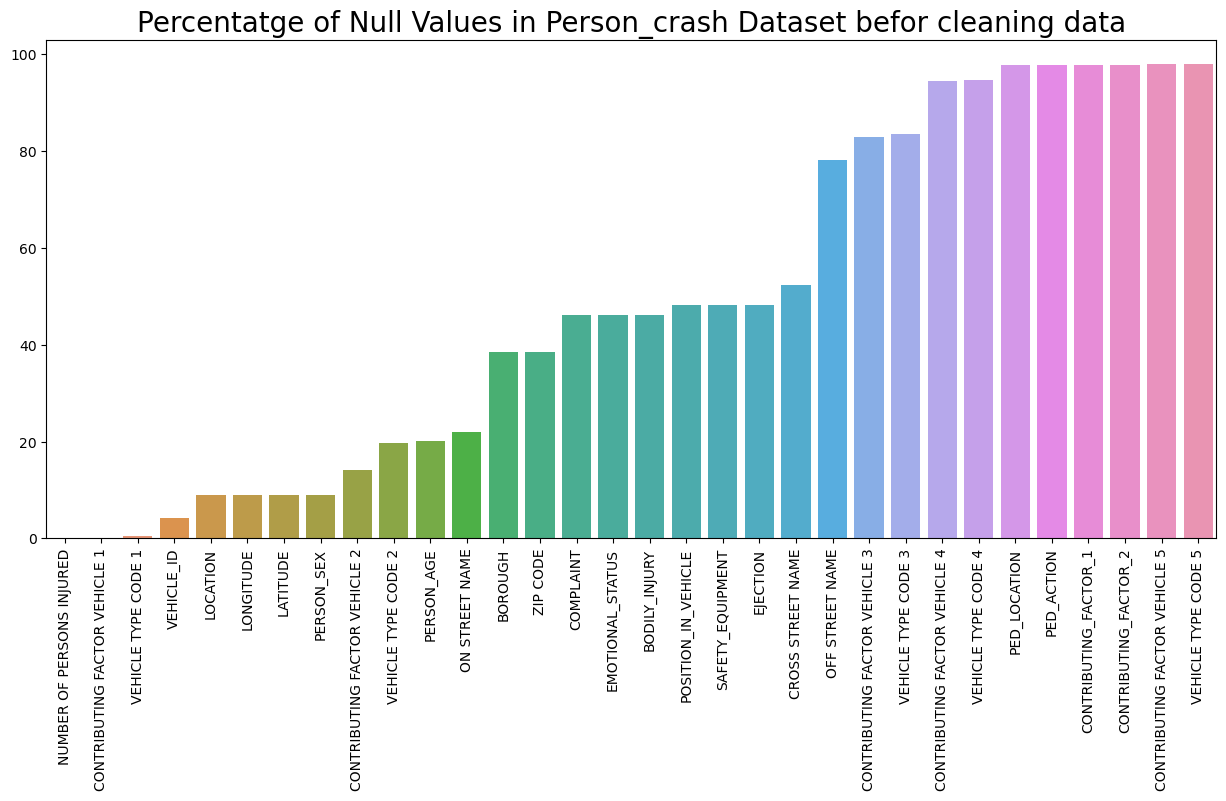


CONTRIBUTING FACTOR VEHICLE 1 : Null value to Unsepcified(one of existing values)
Before cleaning  646 are null values
After cleaning  0 are null values

VEHICLE TYPE CODE 1 : Null value to Unsepcified(one of existing values)
Before cleaning  1619 are null values
After cleaning  0 are null values

PERSON_AGE : Null value and outlier(older than 120 years old and minus ages) to average age
Before cleaning  77525 are null values

After cleaning  0 are null values
120.0 : Max value
0.0 : Min value
Droped Unused columns

 The shape of person_crash dataset after first cleaning
(386010, 22)
Index(['UNIQUE_ID', 'COLLISION_ID', 'PERSON_TYPE', 'PERSON_INJURY',
       'PERSON_AGE', 'EJECTION', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PERSON_SEX', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1',
       'MONTH', 'DAY', 'WEEK', 'WEEKDAY', 'HOLIDAY', 'INT TIME'],
      dtype='object')

 Null Values in person_cra

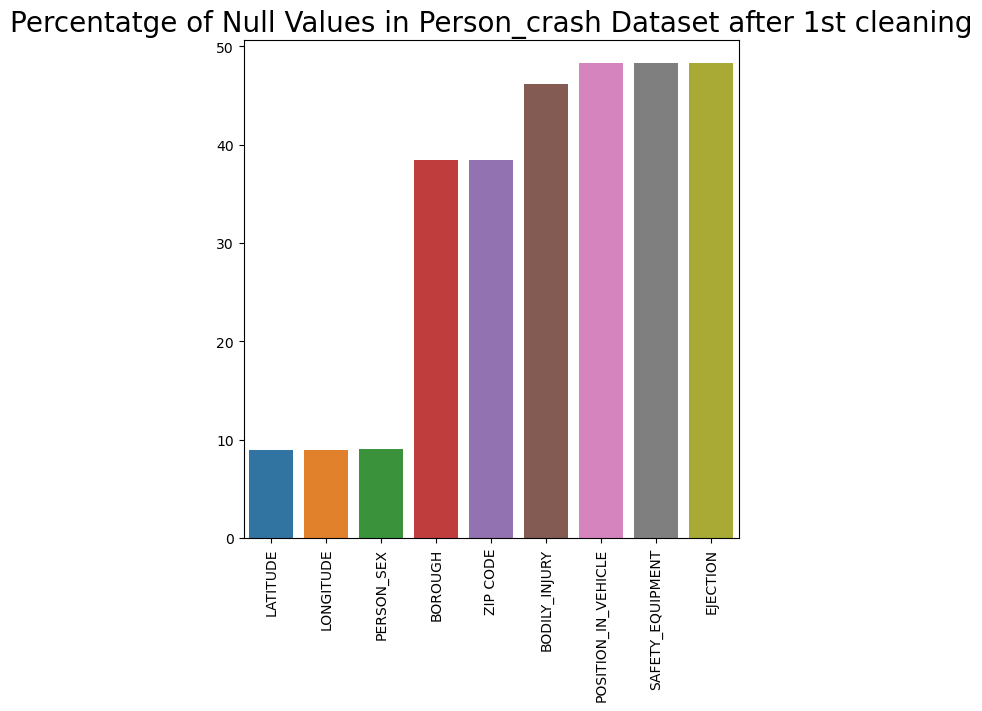

#################### 2nd Cleaning to fill null values and manipulate values ######################

categorizing "VEHICLE TYPE CODE 1"
Befor Categorizing "VEHICLE TYPE CODE 1"

sedan                                  182441
station wagon/sport utility vehicle    138288
taxi                                    10267
bus                                      9135
pick-up truck                            8236
                                        ...  
cherv                                       1
skateboard                                  1
gas mo ped                                  1
pro master                                  1
spark150 s                                  1
Name: VEHICLE TYPE CODE 1, Length: 281, dtype: int64

'VEHICLE TYPE CODE 1' after being categorized 

sedan          322117
truck           21706
taxi            10624
bus              9338
moto             7853
public           4976
others           4786
van              2991
Unspecified      1619
Name: VEHICLE TYP

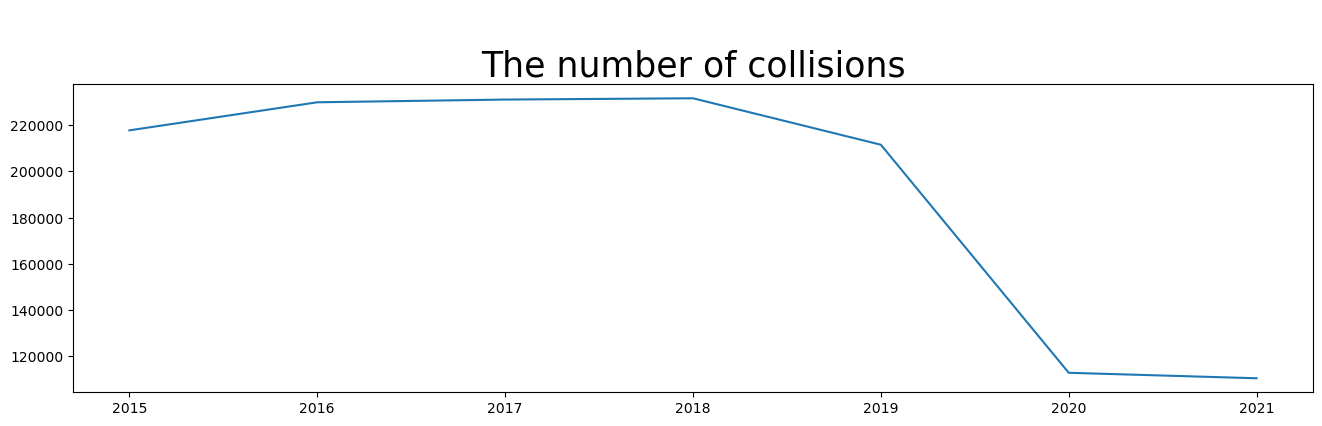

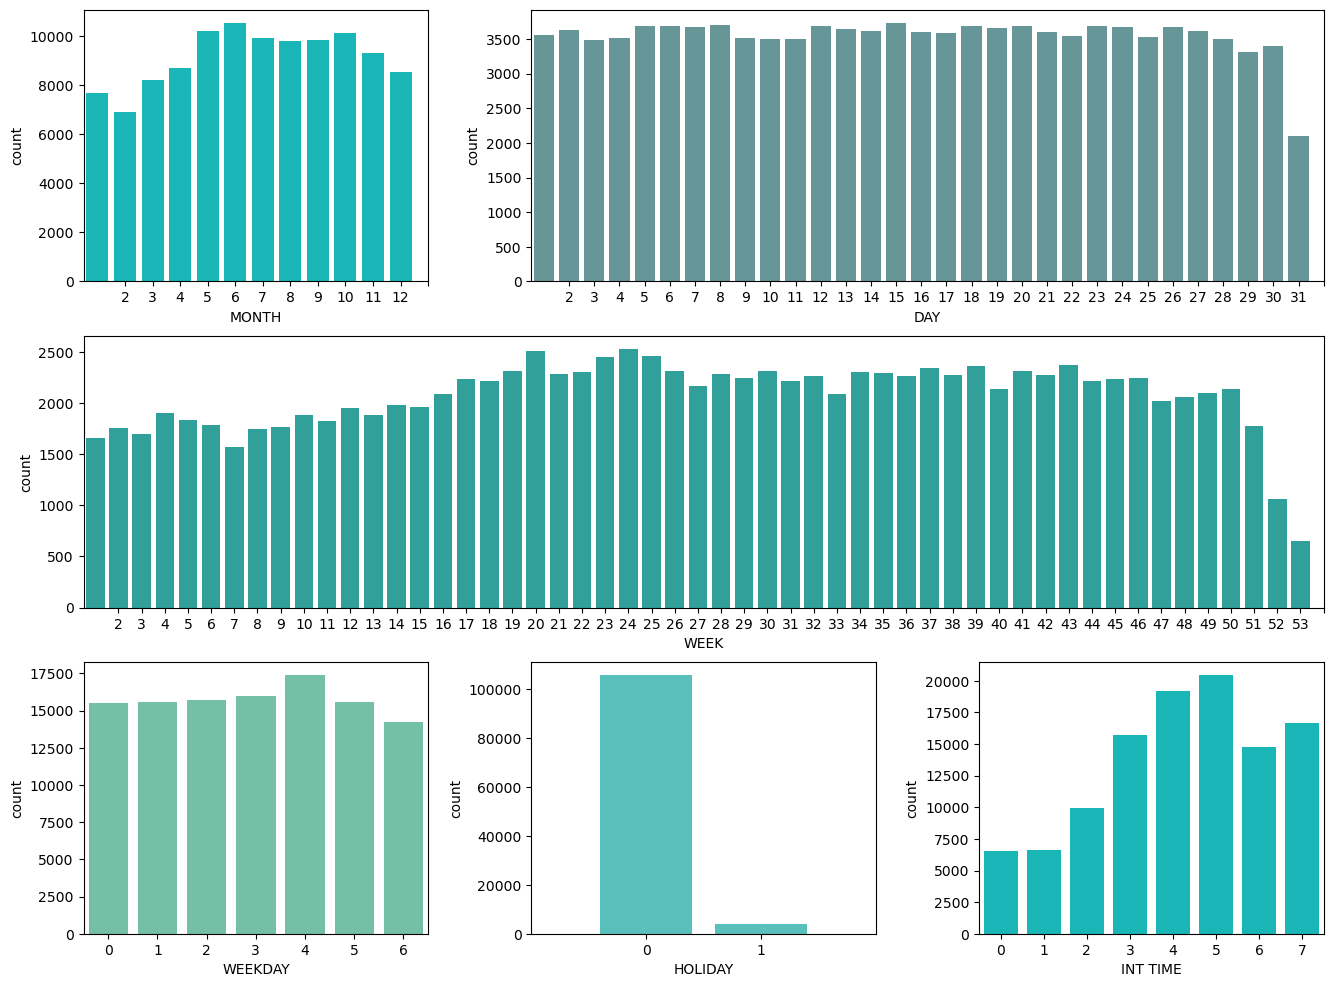

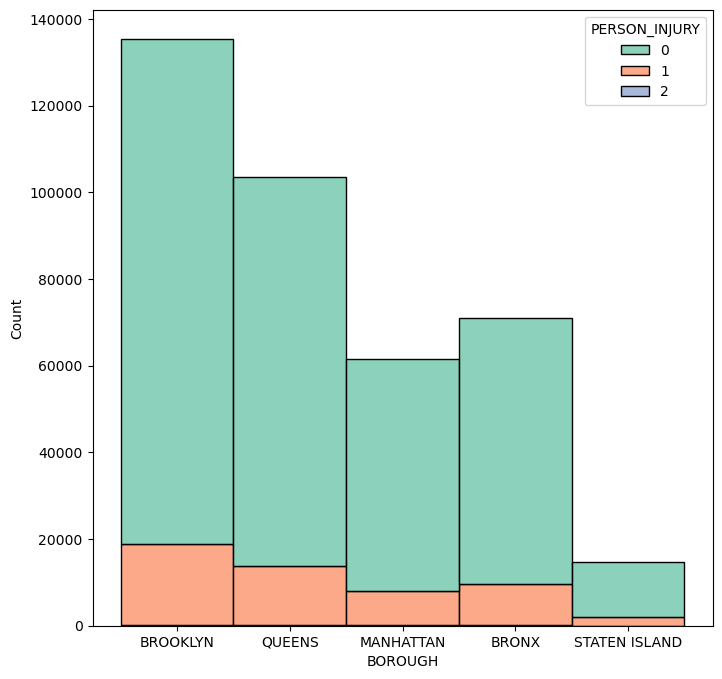

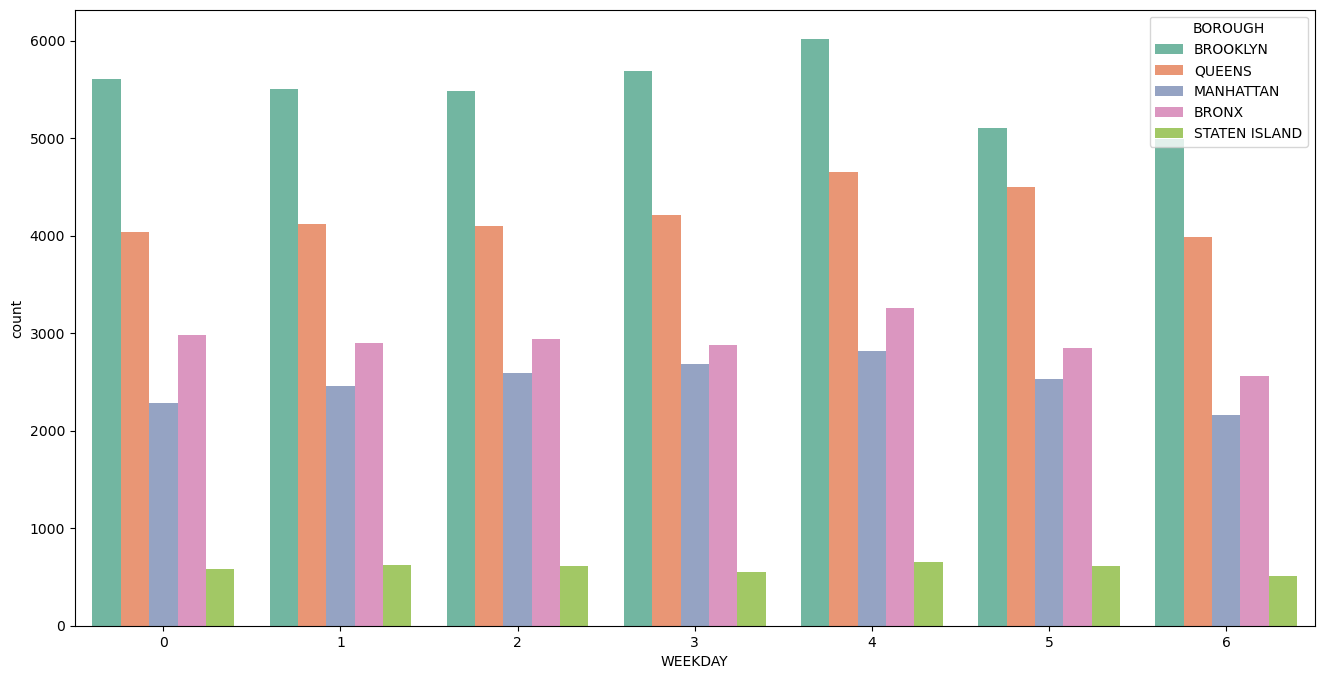

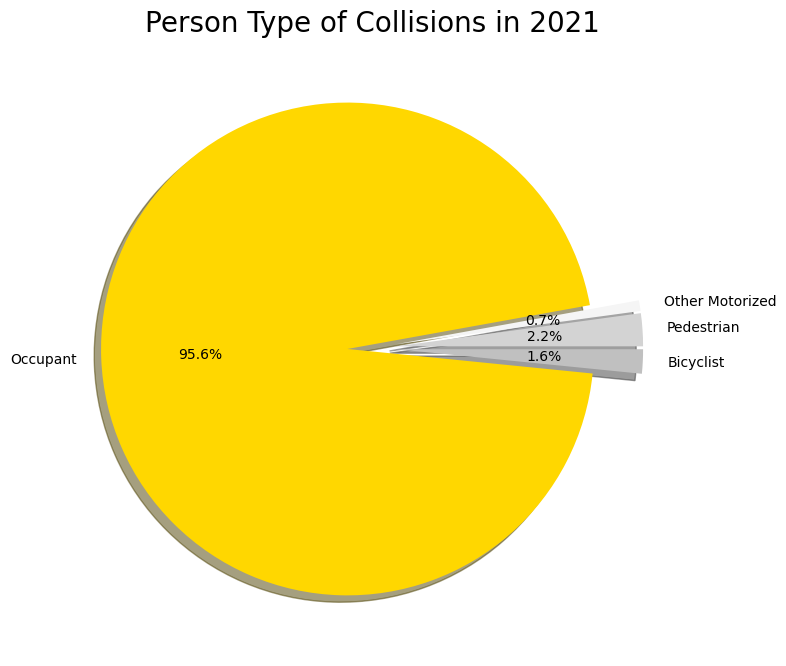

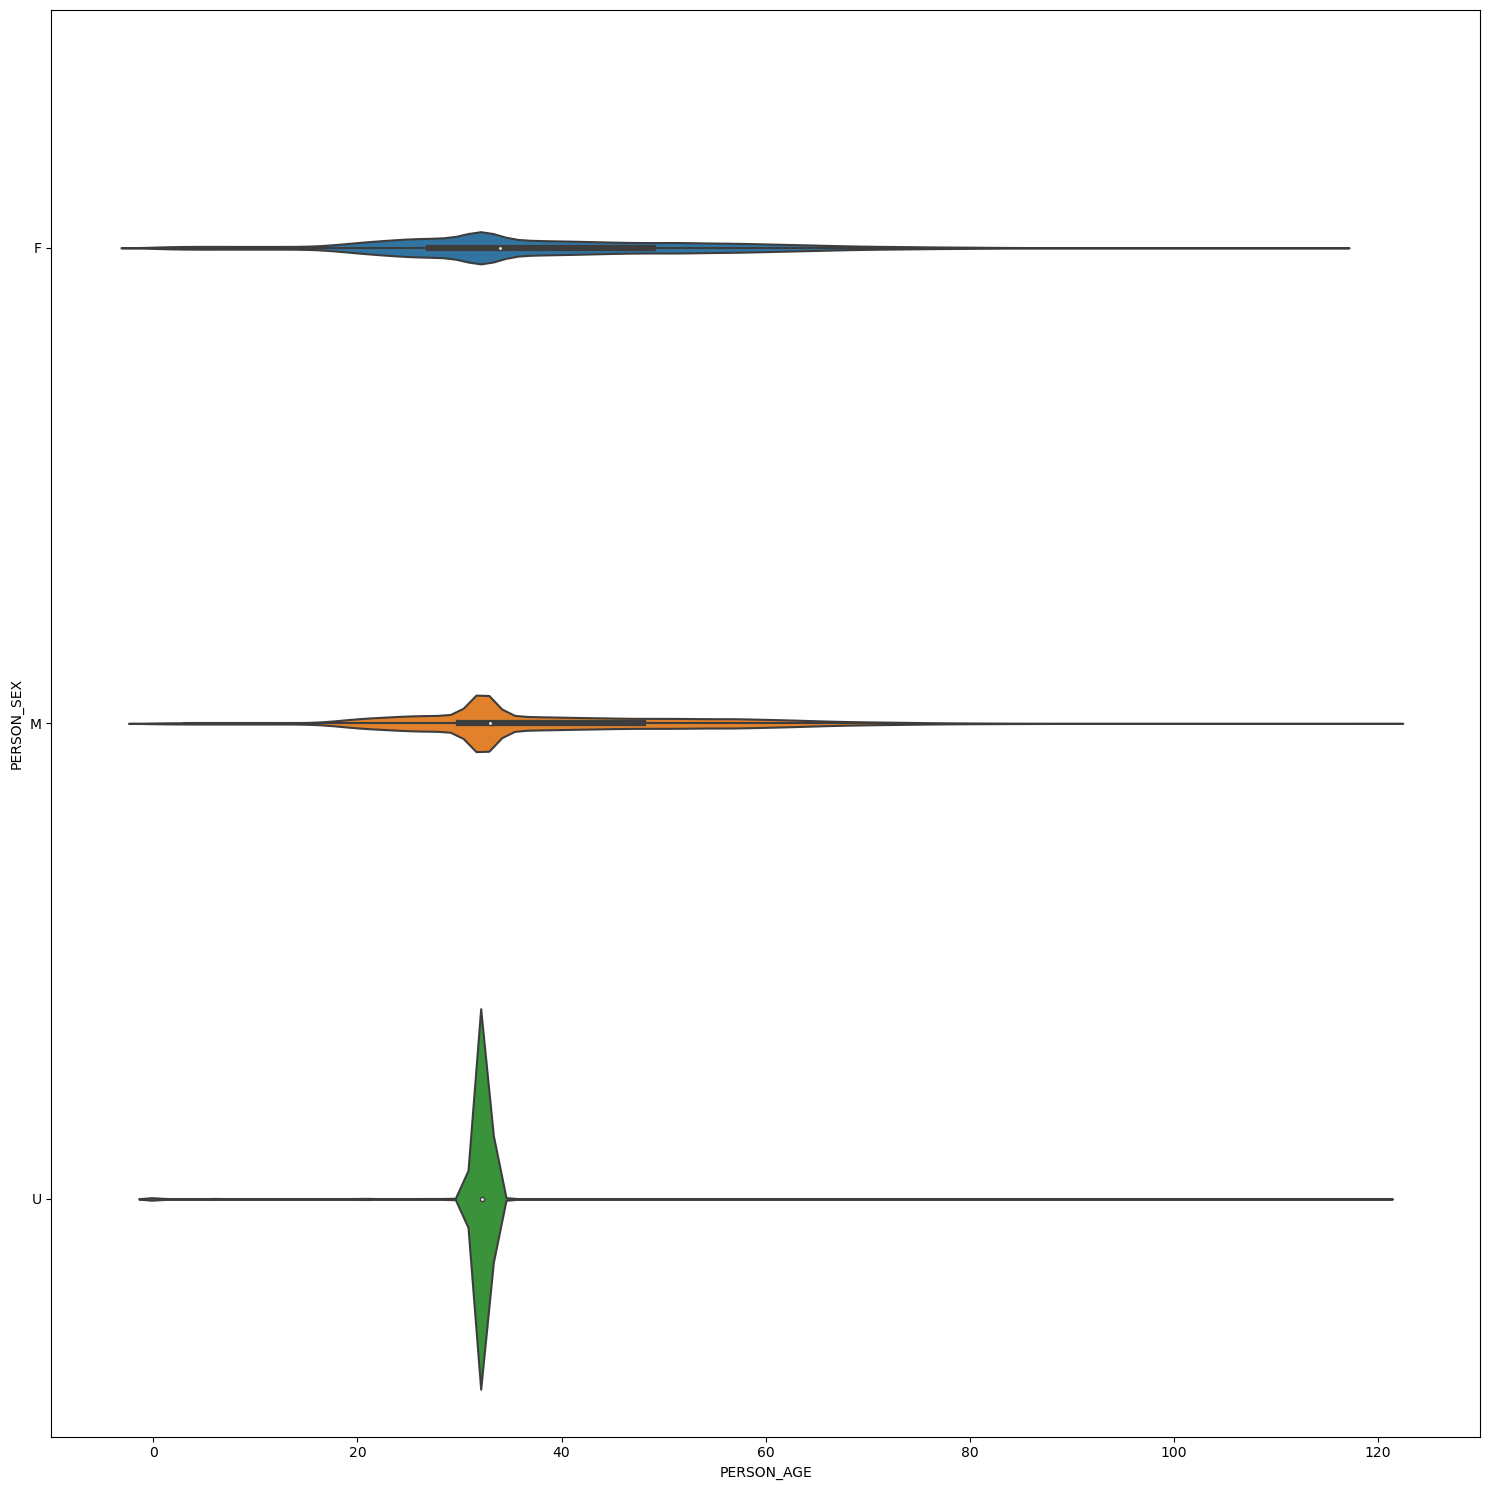

<Figure size 1300x1300 with 0 Axes>

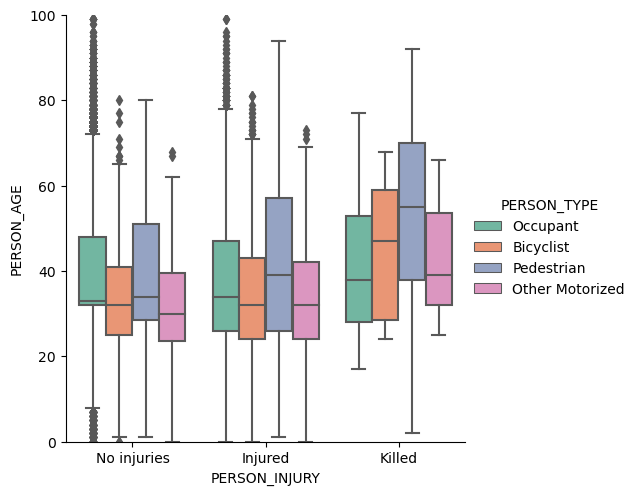

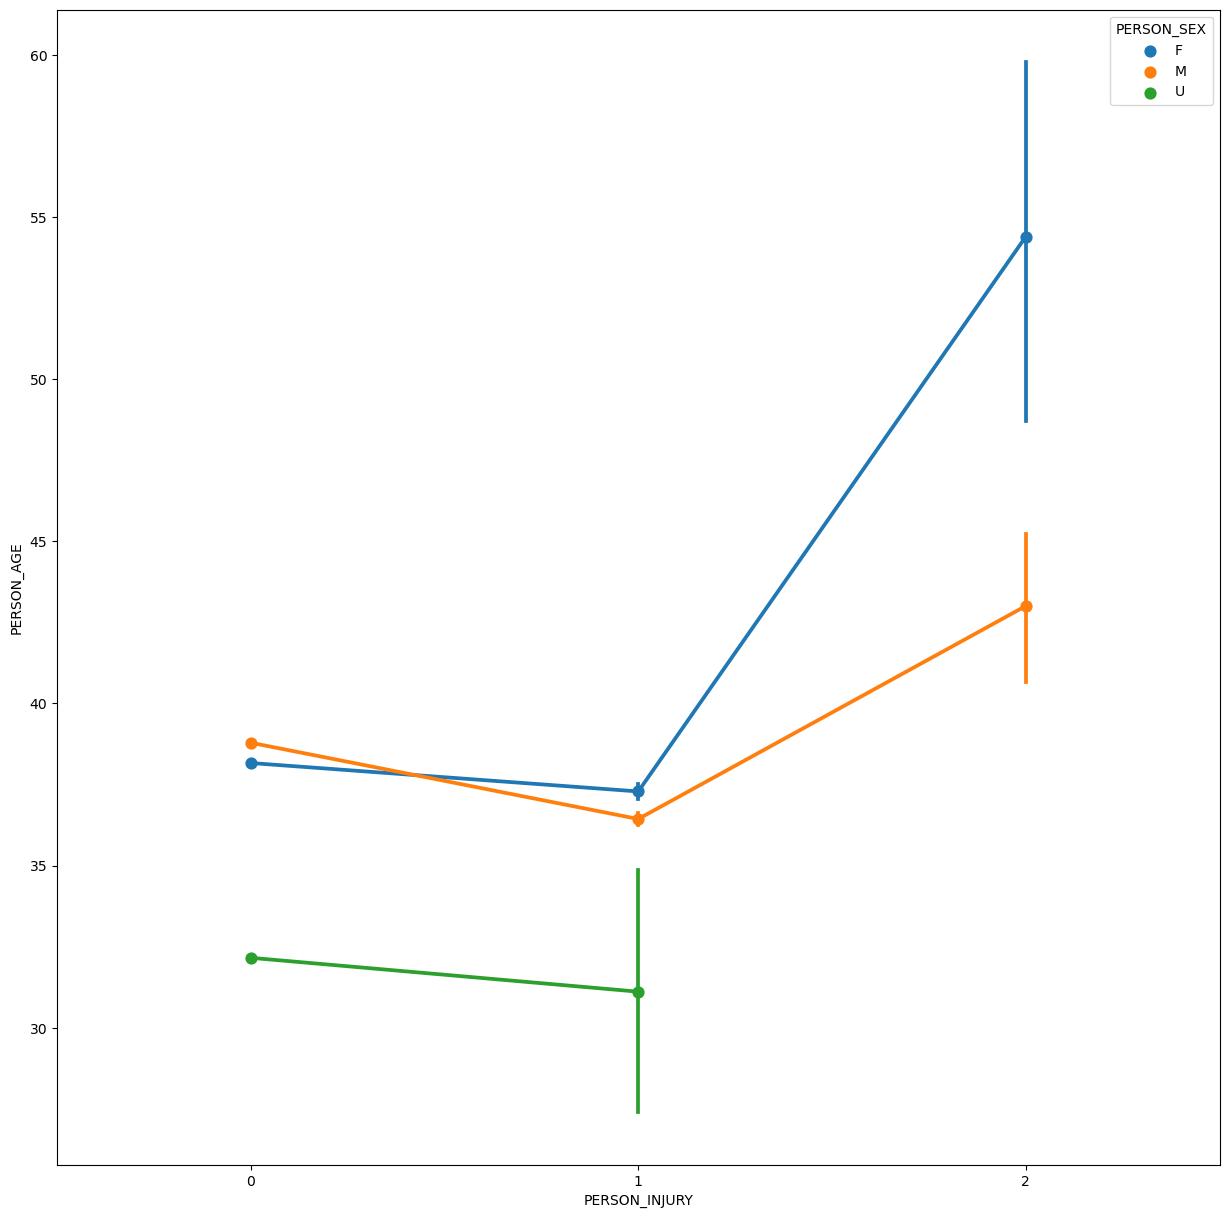

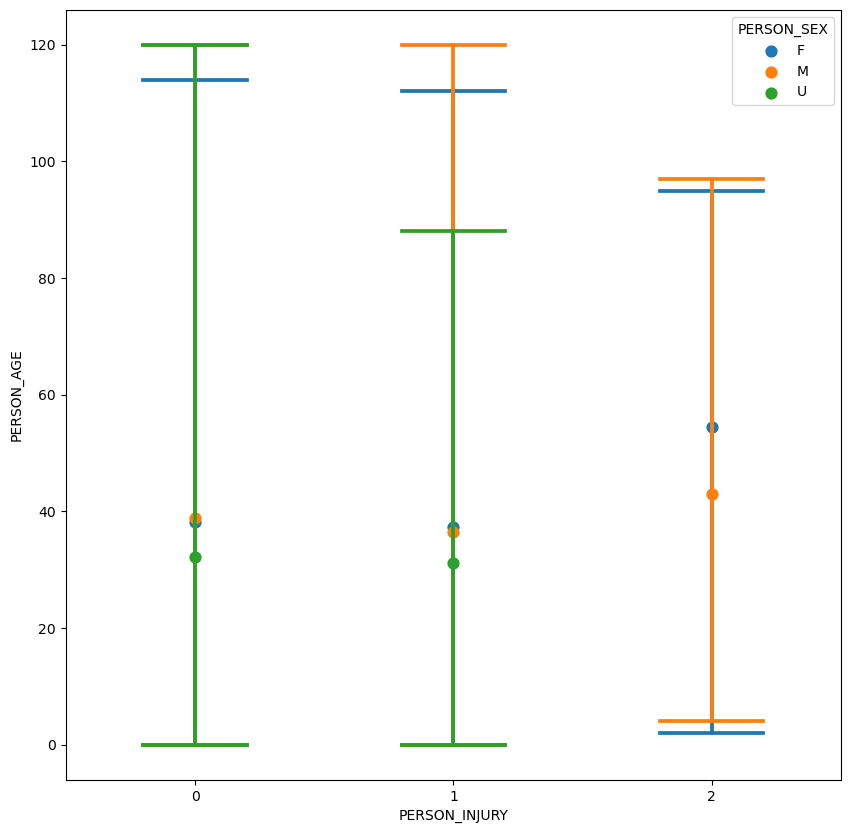

C:\Users\singg\AppData\Local\Temp\ipykernel_2216\855422537.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



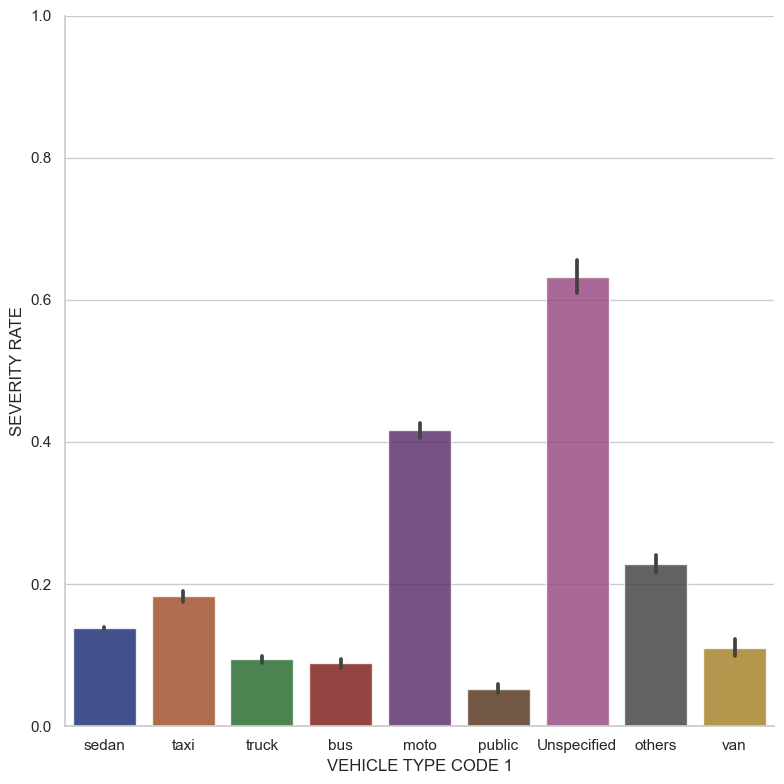

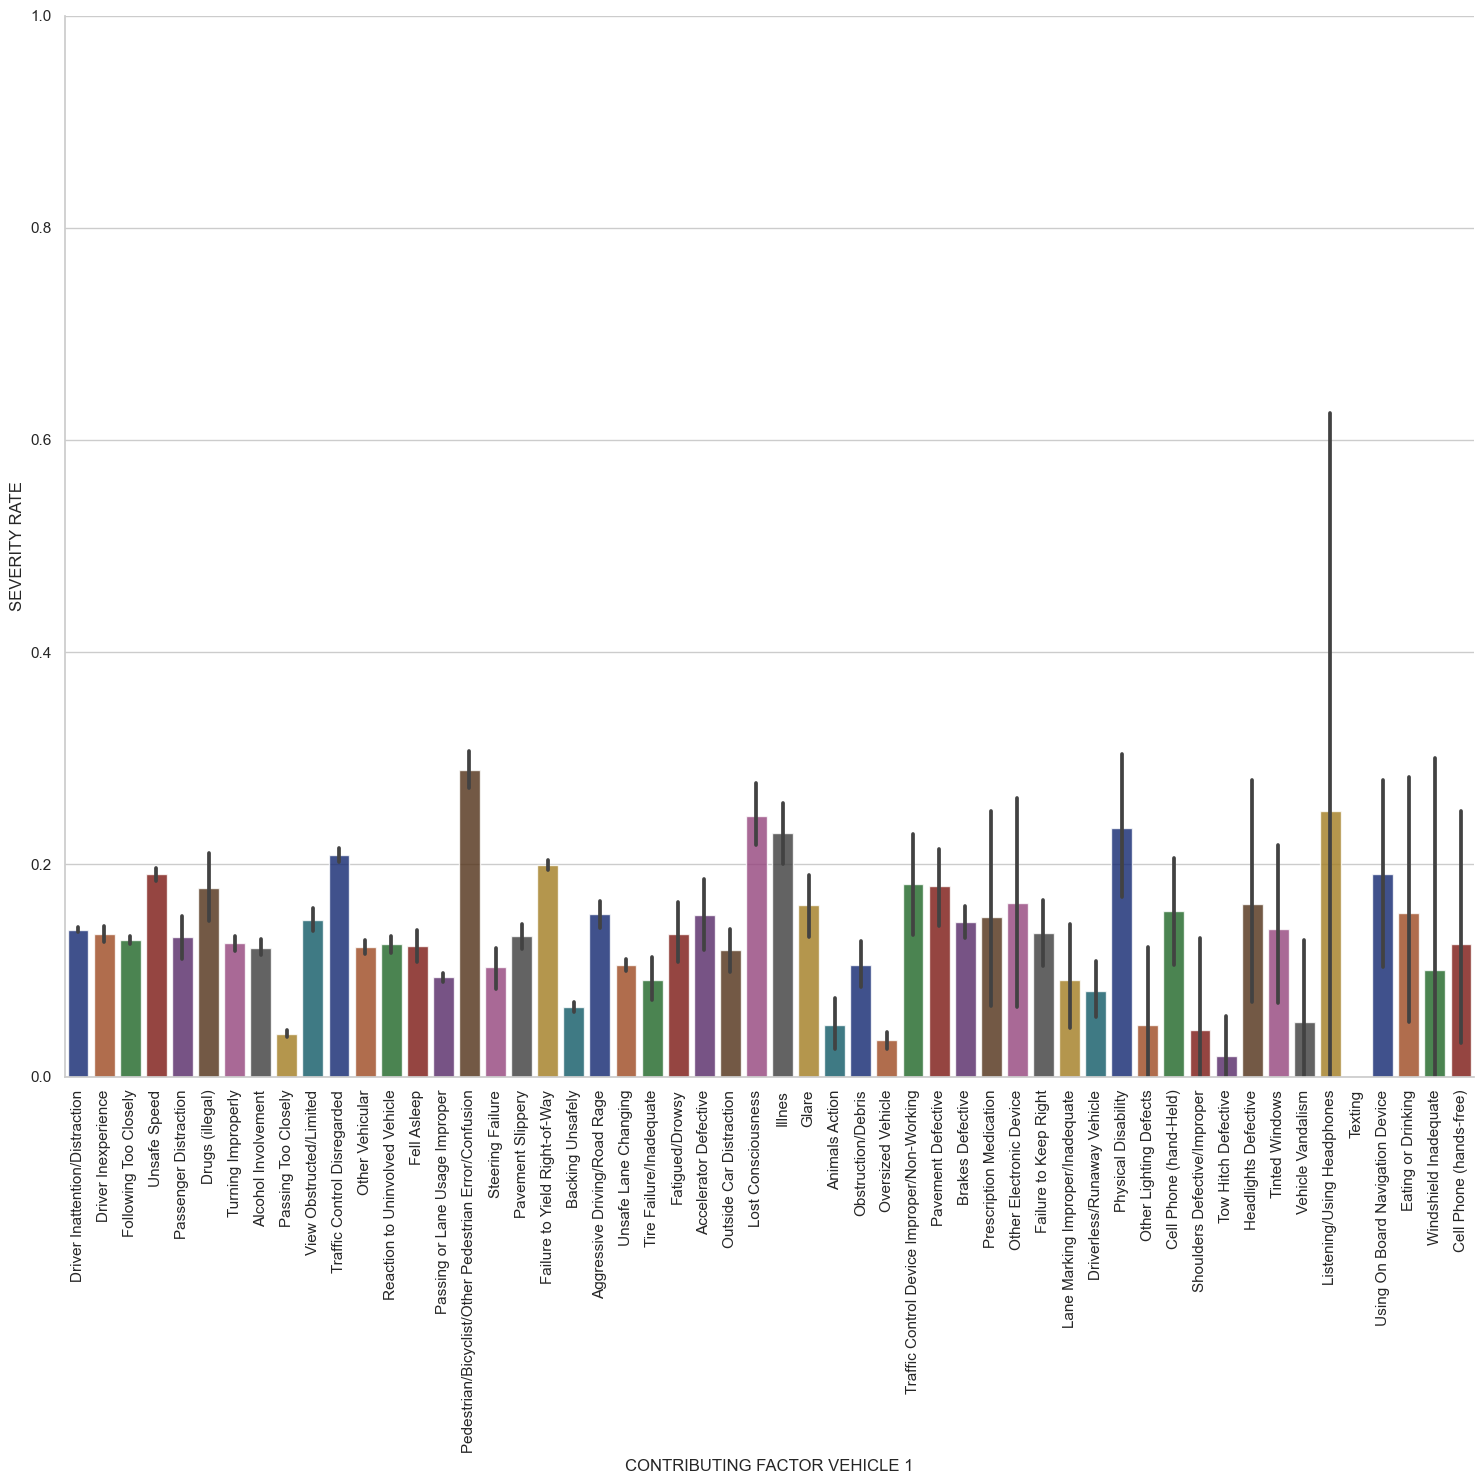

New York City map has been loaded
Converting logitude and latitude to points
drawing the collisions with severity on the map


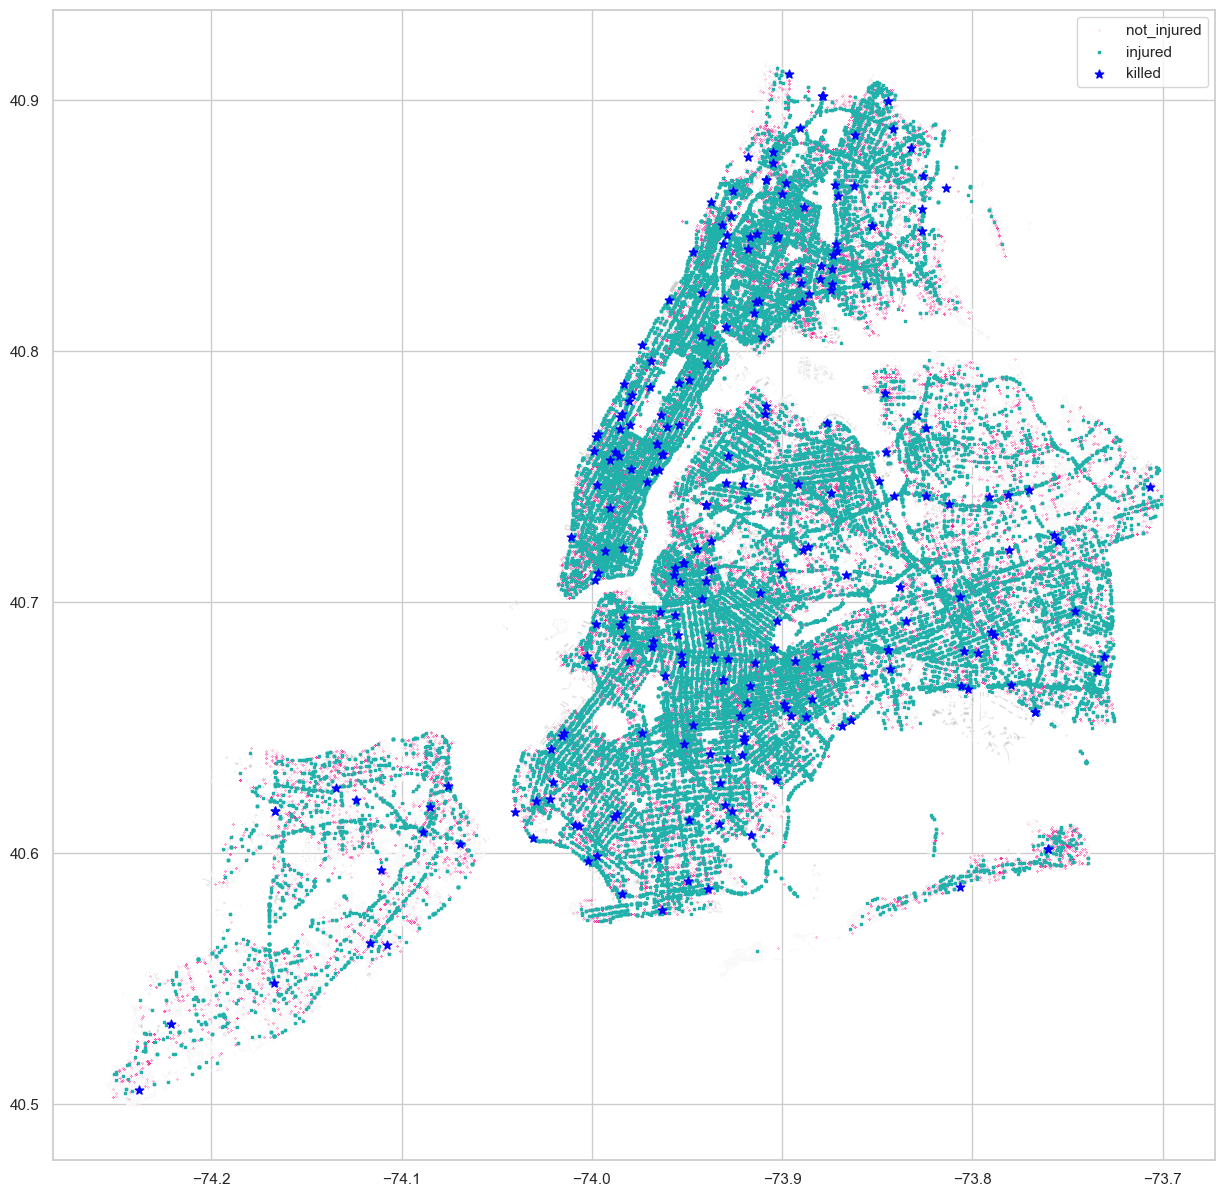

[[100093     10      0]
 [    20  15508     83]
 [     1     75     13]]
0.9983679179295873
0.7099185806034075
0.7131232022984824
0.7114536133088931
0.8560777284047475


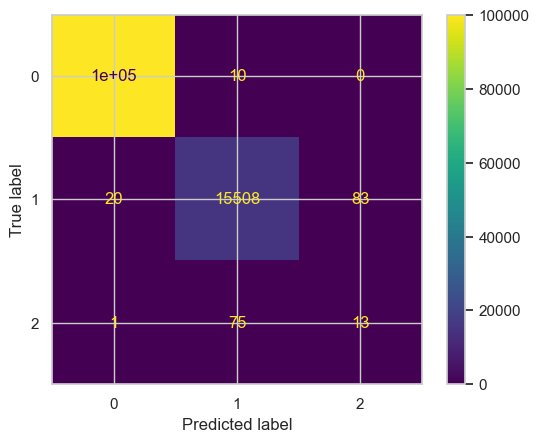

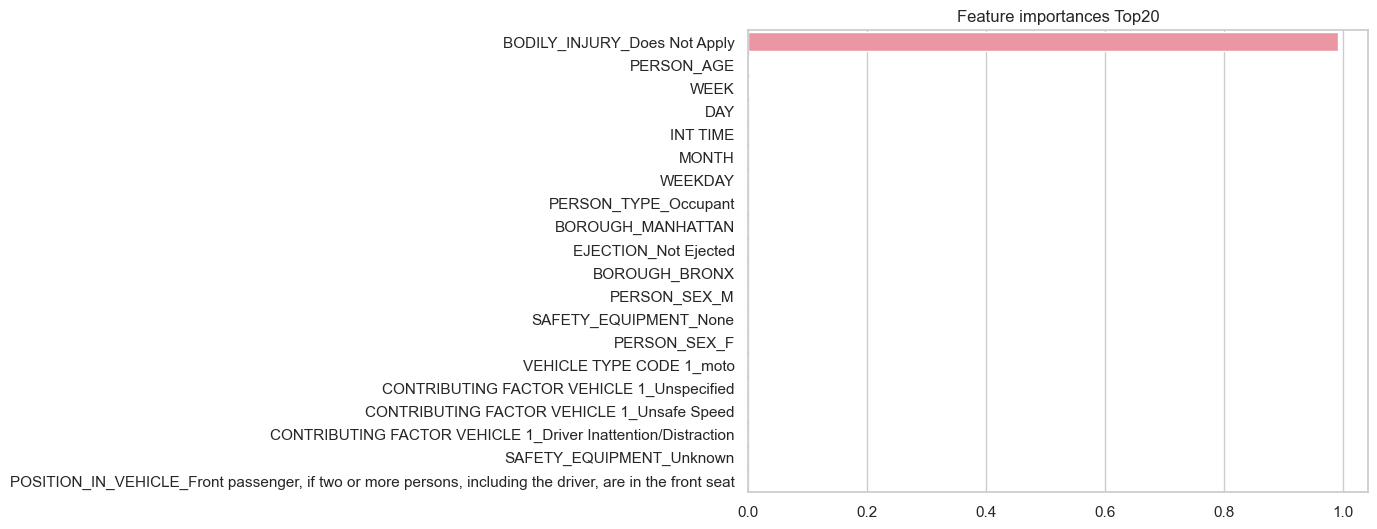

C:\Users\singg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[[100095      8      0]
 [     3  15608      0]
 [     1     88      0]]
0.9991364645130092
0.6646156491183425
0.6665759700429789
0.66559287876709
0.9961471969736335


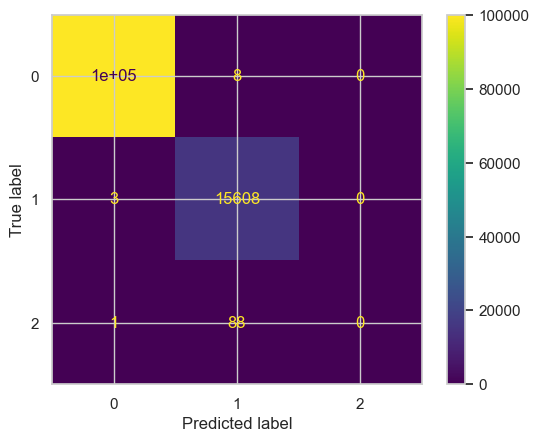

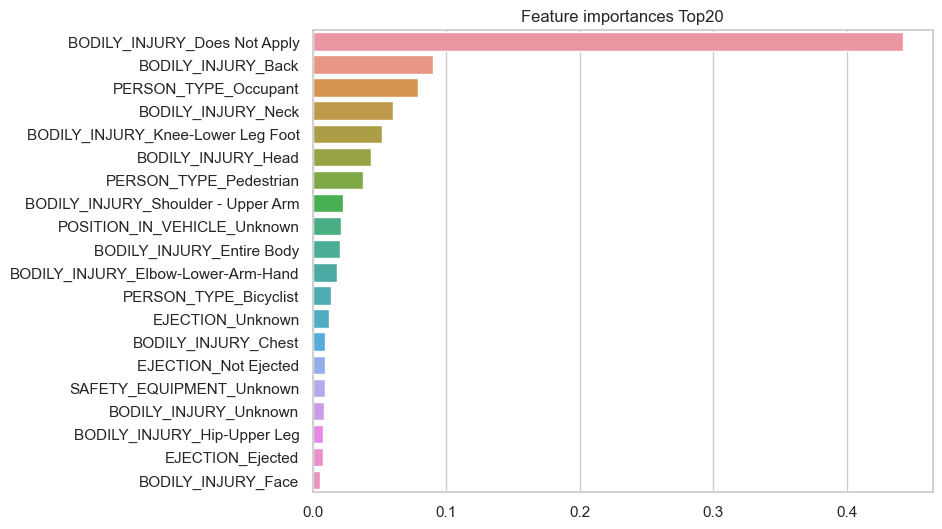

C:\Users\singg\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\singg\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[21:12:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:12:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[100095      8      0]
 [     3  15608      0]
 [     1     87      1]]
0.999145099867879
0.9979700800531489
0.6703212883950388
0.6730108973875412
0.9945858970678998


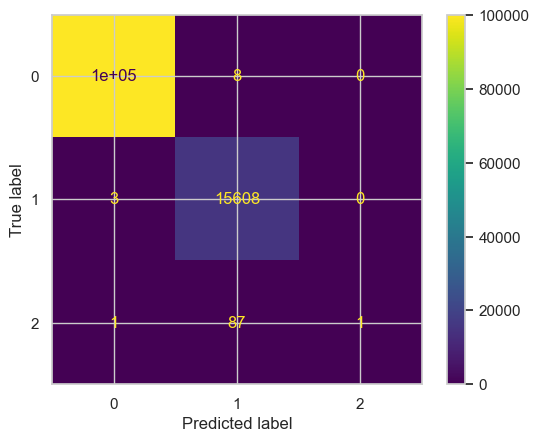

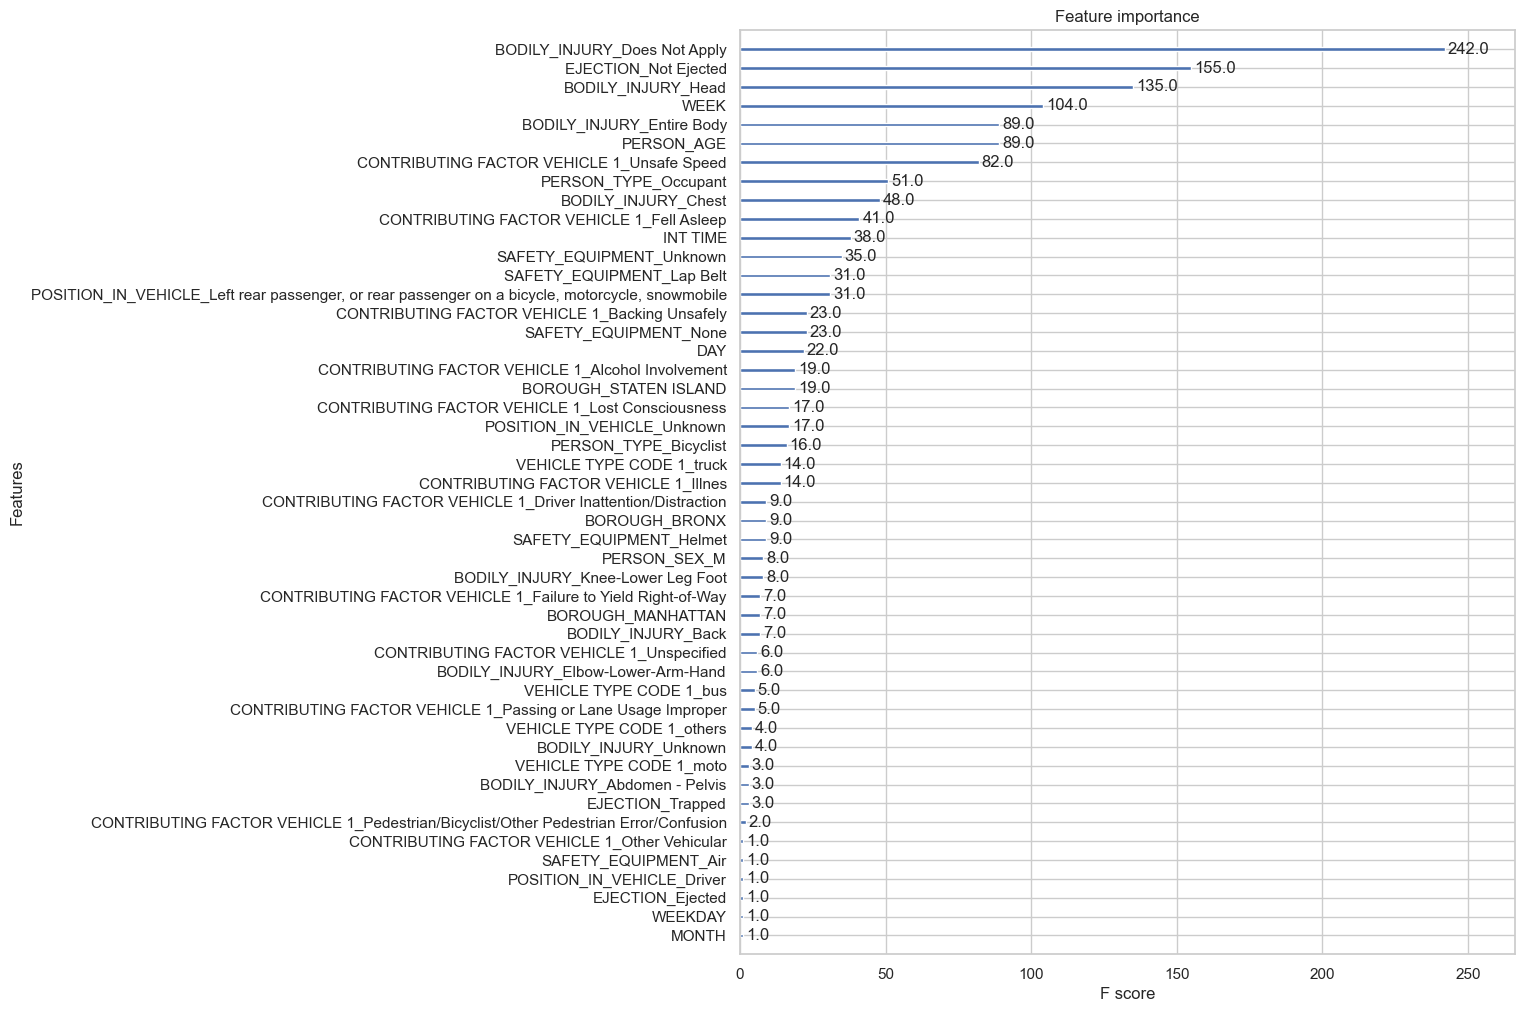

In [41]:
if __name__=="__main__":
    intro_inst()
    start_enter(1)
    
    
    urls = ['https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/data',\
           'https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Person/f55k-p6yu/data']
    seps = [1, 2]
    s_date = '01012021'
    f_date = '12312021'

    
    for i in range(len(urls)):
        scrap_data(seps[i], urls[i], s_date, f_date)
    
    start_enter(2)

    crashes = file_reader('Motor_Vehicle_Collisions_-_Crashes.csv')
    person = file_reader('Motor_Vehicle_Collisions_-_Person.csv')
    person_crash = person.merge(crashes, how='left', on='COLLISION_ID')
    l_person_crash = person_crash.shape[0]
    
    datasets()
    
    cleaning1_inst()    
    label_target(person_crash)
    conv_time_variables(person_crash)
    
    cleaning_data(person_crash)
    
    cleaning_data2(person_crash)
    df = model_dataset(person_crash)
    graphs(df, person_crash)
    generating_models(df)